<div class="alert alert-block alert-info">
<h1> Text Mining Project: Stock Sentiment <br>
Predicting Market Behavior from Tweets</h1><br>
 Text Mining 2025<br>
NOVA IMS MDSAA

# Group 12

|   | Student Name          |  Student ID |
|---|-----------------------|    ---      |
| 1 | Hassan Bhatti       |  20241023 |
| 2 | Moeko Mitani          |   20240670  |
| 3 | Oumayma Ben Hfaiedh   |   20240699  |
| 4 | Rute D'Alva Teixeira      |  20240667  |
| 5 | Sarah Leuthner    |   20240581  |  

# Project Overview

The goal of this project is to develop an NLP model capable of predicting Market sentiment based on tweets. <br>
We are going to implement a classification model that receives tweets as inputs and is able to predict, for each tweet, if it describes a **Bearish (0)**, **Bullish (1)**, or **Neutral (2)** attitude.

# Table of Contents

* [<font color='#52b69a'>1 - Data Integration</font>](#1.) <br>
    - [1.1. Import Libraries ](#1.1.)<br>
    - [1.2. Import Data ](#1.2.)<br>  

* [<font color='#52b69a'>2 - Data Exploration for Train Set</font>](#2.) <br>
    - [2.1. Brief Preliminary Analysis  ](#2.1.) <br>
    - [2.2. Visual EDA  ](#2.2.) <br>
        - [2.2.1 Distribution of The Labels ](#2.2.1.) <br>
        - [2.2.2. Common Used Words Per Sentiment](#2.2.2.) <br>
        - [2.2.3. Length of The Tweets](#2.2.3.) <br>
        - [2.2.4. Number of The Characters](#2.2.4.) <br>
        - [2.2.5. Length Difference between Each Sentiment](#2.2.5.) <br>
        - [2.2.6. Most Common Tickets](#2.2.6.)
        - [2.2.7. Capital Letters Ratio](#2.2.7.)
        - [2.2.8. Link Attached Frequency](#2.2.8.)
        - [2.2.9. Common Used Stopwords and Special Symbols Ratio](#2.2.9.)
        - [2.2.10. Named Entity Recognition (NER)](#2.2.10.)
        - [2.2.11. Top Organizations](#2.2.11.)
        - [2.2.12. Top People](#2.2.12.)
        - [2.2.13. Top Countries/Cities](#2.2.13.)
        - [2.2.14. Top Products](#2.2.14.)
        - [2.2.15. Top Monetary Amounts](#2.2.15.)
        - [Sentiment Distribution for Top 15 Organizations (NER)](#2.2.16.)
    - [2.3. Lexicon-based Sentiment Analysis](#2.3.) <br>
    - [2.4. Character Encoding Issues](#2.4.) <br>

* [<font color='#52b69a'>3. Data Exploration for Test Set</font>](#3.) <br>
    - [3.1. Brief Preliminary Analysis](#3.1.) <br>
    - [3.2. Length of Texts](#3.2.) <br>
    - [3.3. Word Count Distribution](#3.3.) <br>
    - [3.4. Most Frequent Words (Tokens)](#3.4.)<br>
        - [3.4.1. Word Cloud](#3.4.1.)<br>
    - [3.5. Character Encoding Issues)](#3.5.)<br>

* [<font color='#52b69a'>4. Side-by-Side Comparison of Train and Test Sets Distributions</font>](#4.) <br>
    - [4.1. Text Length Comparision](#4.1.) <br>
    - [4.2. Word Count Comparison](#4.2.) <br>

* [<font color='#52b69a'>5. Corpus Split </font>](#5.) <br>

* [<font color='#52b69a'>6.  Data Preprocessing </font>](#6.) <br>
    - [6.1. For Text Models](#6.1.) <br>
      - [6.1.1. LSTM ](#6.1.1.) <br>
      - [6.1.2. Transformers ](#6.1.2.) <br>
    - [6.2. For ML Models](#6.2.) <br>

* [<font color='#52b69a'>6 - Feature Engineering </font>](#6.)<br>
    - [6.1. Techniques Used](#6.1.)
    - [6.2. Additional Transformer-Based Embedding: Sentence-Bert](#6.2.)

<a class="anchor" id="1.">

# 1. Data Integration
<a>

<a class="anchor" id="1.1.">

## 1.1. Import Libraries
<a>

In [ ]:
%pip install spacy

In [ ]:

!python -m spacy download en_core_web_sm

!pip install vaderSentiment
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 43.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict

# Text processing and NLP
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import pos_tag
import spacy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

# Machine learning - sklearn
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer

# Deep learning - Keras text preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Transformers
from transformers import AutoTokenizer

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<a class="anchor" id="1.2.">

# 1.2. Import Data
<a>

In [ ]:
# Load data
train_df = pd.read_csv("train.csv", encoding='latin-1')
test_df = pd.read_csv("test.csv", encoding='latin-1')

<a class="anchor" id="2.">

# 2. Data Exploration for Train Set
<a>

<a class="anchor" id="2.1.">

## 2.1. Brief Preliminary Analysis
<a>

In [ ]:
# Check the number of columns
train_df.columns

Index(['text', 'label'], dtype='object')

In [ ]:
# Check how many rows and columns are in train dataset
train_df.shape

(9543, 2)

In [ ]:
train_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
text,9543,9543,"YNDX, I, QD and OESX among tech movers",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
label,9543.0,NaN,NaN,NaN,1.49628,0.743139,0.0,1.0,2.0,2.0,2.0


In [ ]:
train_df.head()

,text,label
0,$BYND - JPMorgan reels in expectations on Beyo...,0
1,$CCL $RCL - Nomura points to bookings weakness...,0
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0
3,$ESS: BTIG Research cuts to Neutral https://t....,0
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0


In [ ]:
test_df.head()

,id,text
0,0,ETF assets to surge tenfold in 10 years to $50...
1,1,Hereâs What Hedge Funds Think Evolution Petr...
2,2,$PVH - Phillips-Van Heusen Q3 2020 Earnings Pr...
3,3,China is in the process of waiving retaliatory...
4,4,"Highlight: âWhen growth is scarce, investors..."


### Creating New Feature

There are 2 features: 'text' and 'label'. We are going to add a new feature 'label_name' using 'label' as follows:
- 0 --> *Bearish*
- 1 --> *Bullish*
- 2 --> *Neutral*

In [ ]:
# Map label numbers to names for visualization
label_map = {0: 'Bearish', 1: 'Bullish', 2: 'Neutral'}
train_df['label_name'] = train_df['label'].map(label_map)

We are going to verify if the numerical labels (label) correspond correctly to their names (label_name).

In [ ]:
# Check unique values in train dataset
train_df['label_name'].value_counts()

,count
label_name,
Neutral,6178
Bullish,1923
Bearish,1442


In [ ]:
# check if labels are correct according to the label name -> YES THEY MATCH
train_df[['label', 'label_name']].drop_duplicates()

,label,label_name
0,0,Bearish
126,1,Bullish
358,2,Neutral


In [ ]:
# Check unique values in train dataset again
train_df['label_name'].value_counts()

,count
label_name,
Neutral,6178
Bullish,1923
Bearish,1442


### Missing Values

In [ ]:
# Check missing values
train_df.isna().sum()

,0
text,0
label,0
label_name,0


**There is no missing values in train dataset.**

### Duplicates

We are going to check if there is a duplicated tweet.

In [ ]:
# Duplicate tweet check
duplicate_count = train_df.duplicated(subset='text').sum()
total_count = len(train_df)
print(f"Duplicate tweets: {duplicate_count} / {total_count} ({100 * duplicate_count / total_count:.2f}%)")

Duplicate tweets: 0 / 9543 (0.00%)


**There is no dulpicated tweet.**

<a class="anchor" id="2.2.">

## 2.2. Visual EDA
<a>

We are going to check training dataset by visualizations.

<a class="anchor" id="2.2.1">

### 2.2.1. Distribution of The Labels
<a>

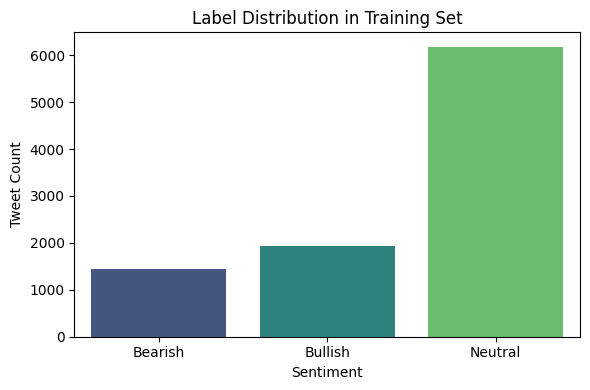

In [ ]:
#Label distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='label_name', order=['Bearish', 'Bullish', 'Neutral'], palette='viridis')
plt.title('Label Distribution in Training Set')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.tight_layout()
plt.show()

Most tweets are labeled as Neutral.

<a class="anchor" id="2.2.2.">

### 2.2.2. Common Used Words Per Sentiment
<a>

*What are common used words per sentiment?*

In [ ]:
# Download stopwords (only needs to be run once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
# Basic stopwords
stop_words = set(stopwords.words('english'))

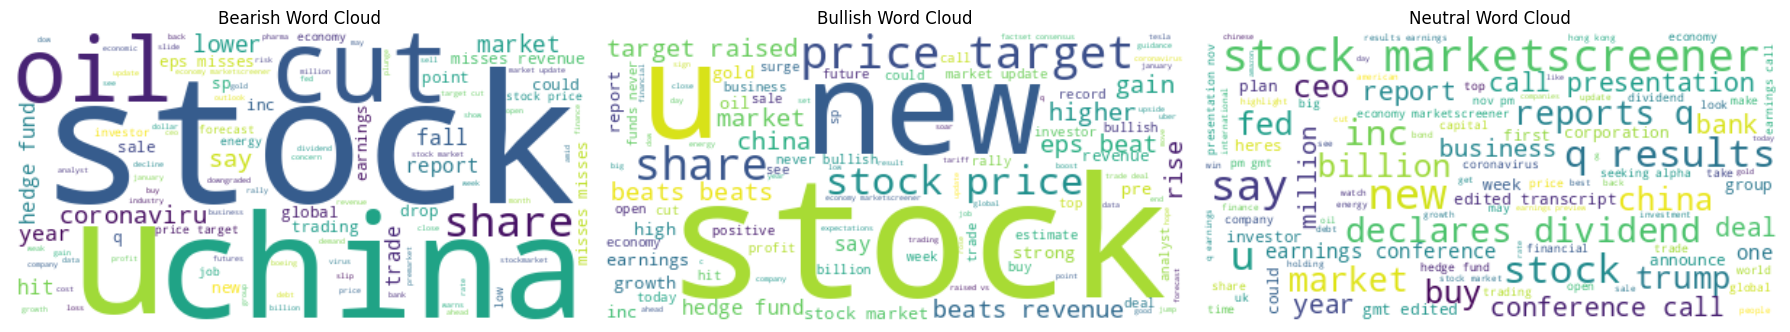

In [ ]:
# Word Clouds for each sentiment
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words]
    return " ".join(tokens)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, sentiment in enumerate(['Bearish', 'Bullish', 'Neutral']):
    subset = train_df[train_df['label_name'] == sentiment]
    cleaned_text = subset['text'].apply(preprocess_text)
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', max_words=100).generate(" ".join(cleaned_text))
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(f"{sentiment} Word Cloud")
plt.tight_layout()
plt.show()

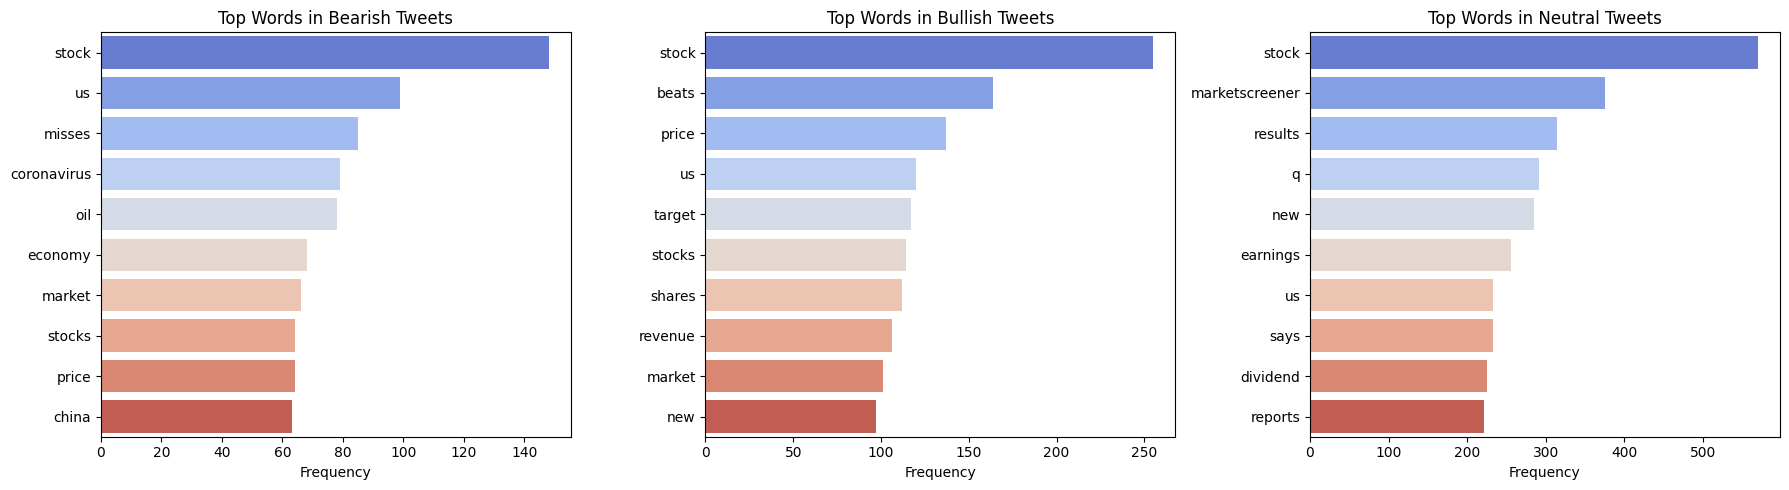

In [ ]:
# Top frequent words per sentiment
def get_top_words(texts, n=10):
    all_words = " ".join(texts).split()
    filtered_words = [word for word in all_words if word not in stop_words]
    return Counter(filtered_words).most_common(n)

top_words = {
    sentiment: get_top_words(train_df[train_df['label_name'] == sentiment]['text'].apply(preprocess_text))
    for sentiment in ['Bearish', 'Bullish', 'Neutral']
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for idx, sentiment in enumerate(['Bearish', 'Bullish', 'Neutral']):
    words, freqs = zip(*top_words[sentiment])
    sns.barplot(x=list(freqs), y=list(words), ax=axes[idx], palette='coolwarm')
    axes[idx].set_title(f"Top Words in {sentiment} Tweets")
    axes[idx].set_xlabel("Frequency")
plt.tight_layout()
plt.show()

In all sentiment, 'Stock(s)' and 'US' are ones of the most used words.

<a class="anchor" id="2.2.3.">

### 2.2.3. Length of The Tweets
<a>

*What are the length of the tweets?*

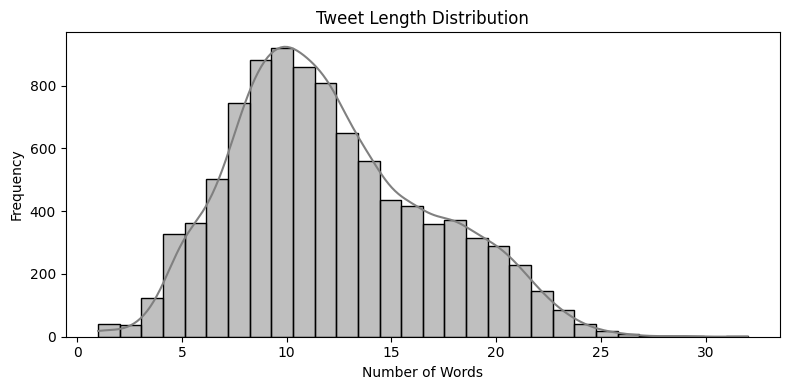

In [ ]:
# Tweet Length Distribution
train_df['tweet_length'] = train_df['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 4))
sns.histplot(train_df['tweet_length'], bins=30, kde=True, color='gray')
plt.title('Tweet Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Most tweets are consisted of around 8 to 12 words in general.

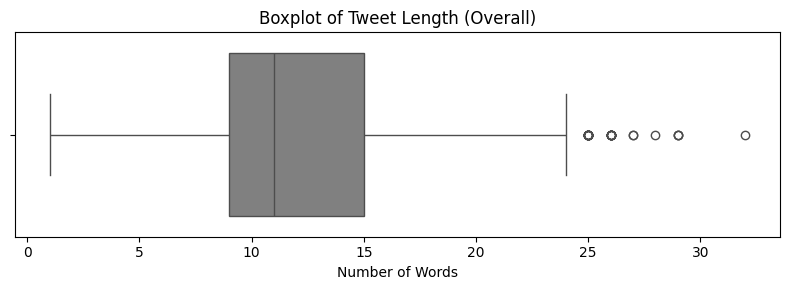

In [ ]:
plt.figure(figsize=(8, 3))  # Wider and shorter
sns.boxplot(x=train_df['tweet_length'], color='gray')
plt.title('Boxplot of Tweet Length (Overall)')
plt.xlabel('Number of Words')
plt.tight_layout()
plt.show()

<a class="anchor" id="2.2.4.">

### 2.2.4. Number of The Characters
<a>

*How many characters do the tweets have?*

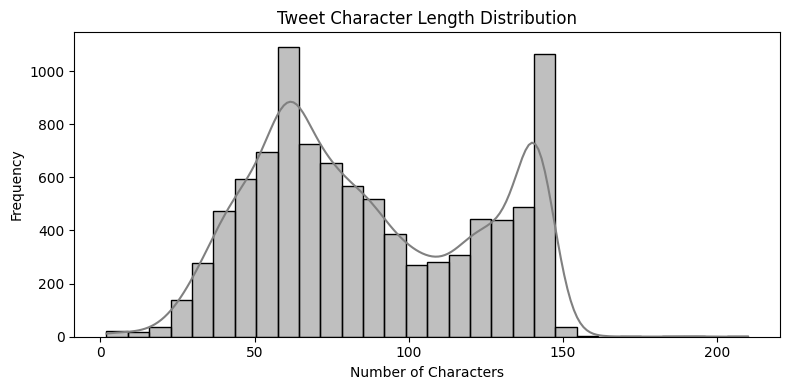

In [ ]:
# Tweet character length distribution ===
train_df['char_length'] = train_df['text'].apply(len)
plt.figure(figsize=(8, 4))
sns.histplot(train_df['char_length'], bins=30, kde=True, color='gray')
plt.title('Tweet Character Length Distribution')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Interestingly, many of the tweets are around 60 and 150 characters in general.

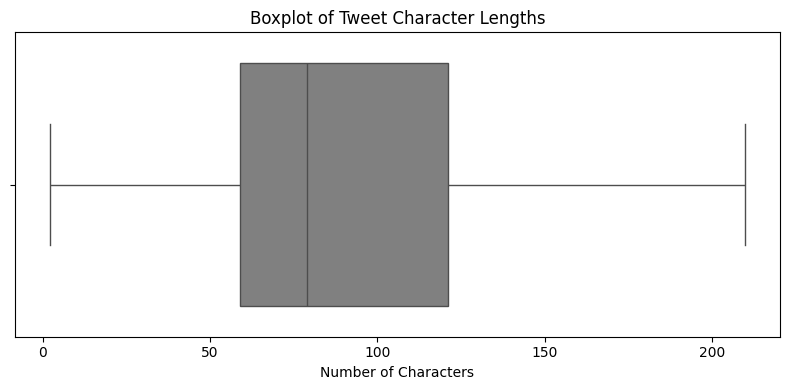

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=train_df['char_length'], color='gray')
plt.title('Boxplot of Tweet Character Lengths')
plt.xlabel('Number of Characters')
plt.tight_layout()
plt.show()

<a class="anchor" id="2.2.5.">

### 2.2.5. Length Difference between Each Sentiment
<a>

*Does the length differ between each sentiment?*

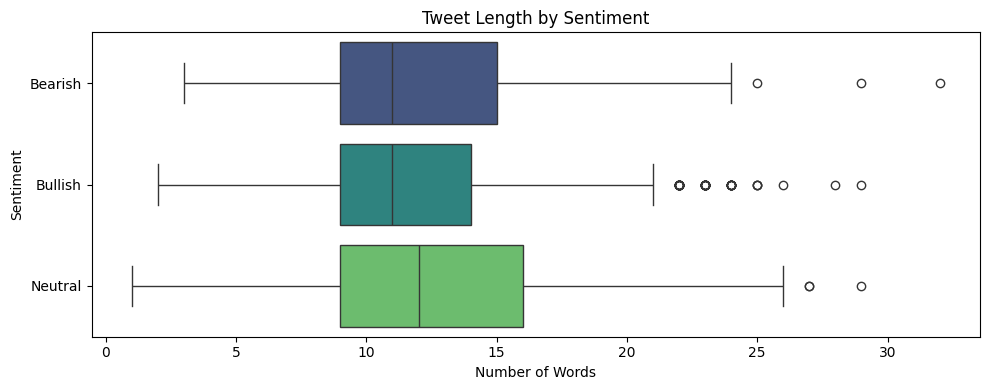

In [ ]:
plt.figure(figsize=(10, 4))  # Wider and slightly shorter
sns.boxplot(y='label_name', x='tweet_length', data=train_df, palette='viridis')
plt.title('Tweet Length by Sentiment')
plt.xlabel('Number of Words')
plt.ylabel('Sentiment')
plt.tight_layout()
plt.show()

There is not a huge difference between the segments.

<a class="anchor" id="2.2.6.">

### 2.2.6. Most Common Tickets
<a>

*What are the most common tickets?*

Tickers (or ticker symbols) are short alphanumeric codes used to uniquely identify publicly traded companies on a stock exchange.

In [ ]:
#Filter out numeric-only matches
def extract_tickers(texts):
    matches = []
    for text in texts:
        # Extract $-prefixed words
        found = re.findall(r'\$\w+', text.upper())
        # Filter out ones that are purely digits like $1, $100
        tickers = [m for m in found if not re.match(r'^\$\d+$', m)]
        matches += tickers
    return Counter(matches).most_common(15)

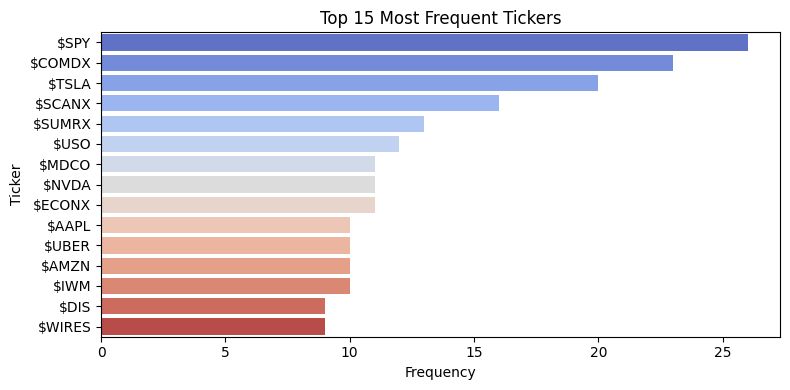

In [ ]:
# Most common tickers (e.g., $AAPL)
top_tickers = extract_tickers(train_df['text'])
tickers, freqs = zip(*top_tickers)
plt.figure(figsize=(8, 4))
sns.barplot(x=list(freqs), y=list(tickers), palette='coolwarm')
plt.title("Top 15 Most Frequent Tickers")
plt.xlabel("Frequency")
plt.ylabel("Ticker")
plt.tight_layout()
plt.show()

'$SPY', '$COMDX', '$TSLA', and '$SCANX' are most frequent tickets in general.

<a class="anchor" id="2.2.7.">

### 2.2.7. Capital Letters Ratio
<a>

*What is the use of captial letters?*

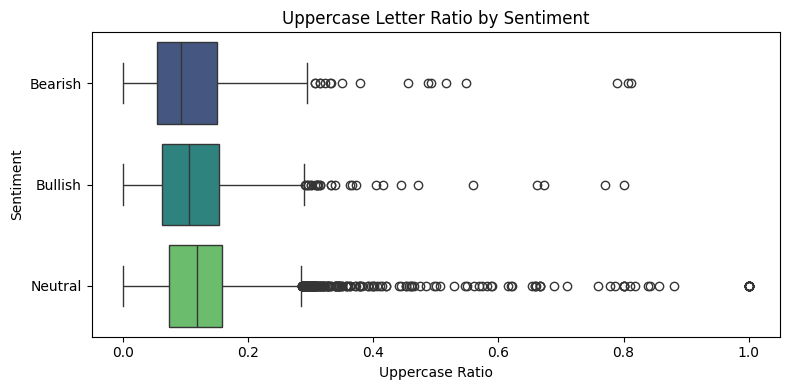

In [ ]:
# Proportion of uppercase letters per tweet
train_df['uppercase_ratio'] = train_df['text'].apply(
    lambda x: sum(1 for c in x if c.isupper()) / len(x) if len(x) > 0 else 0
)

# Boxplot by sentiment (vertical orientation)
plt.figure(figsize=(8, 4))
sns.boxplot(y='label_name', x='uppercase_ratio', data=train_df, palette='viridis')
plt.title('Uppercase Letter Ratio by Sentiment')
plt.ylabel('Sentiment')
plt.xlabel('Uppercase Ratio')
plt.tight_layout()
plt.show()

There is not a huge different between the sentiments.

<a class="anchor" id="2.2.8.">

### 2.2.8. Link Attached Frequency
<a>

*What is the link frequency (e.g., Tweets containing http)?*

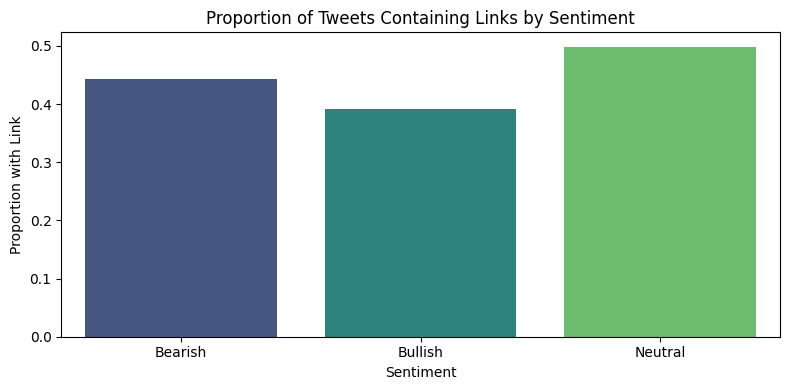

In [ ]:
train_df['has_link'] = train_df['text'].apply(lambda x: 1 if 'http' in x.lower() else 0)

# Proportion of tweets with links per sentiment
link_dist = train_df.groupby('label_name')['has_link'].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x='label_name', y='has_link', data=link_dist, palette='viridis')
plt.title('Proportion of Tweets Containing Links by Sentiment')
plt.ylabel('Proportion with Link')
plt.xlabel('Sentiment')
plt.tight_layout()
plt.show()


There is not a huge difference between the sentiments, around 40-50% of the tweets conain URLs.

<a class="anchor" id="2.2.9.">

### 2.2.9. Common Used Stopwords and Special Symbols Ratio
<a>

*What are the most common stopwords used?*

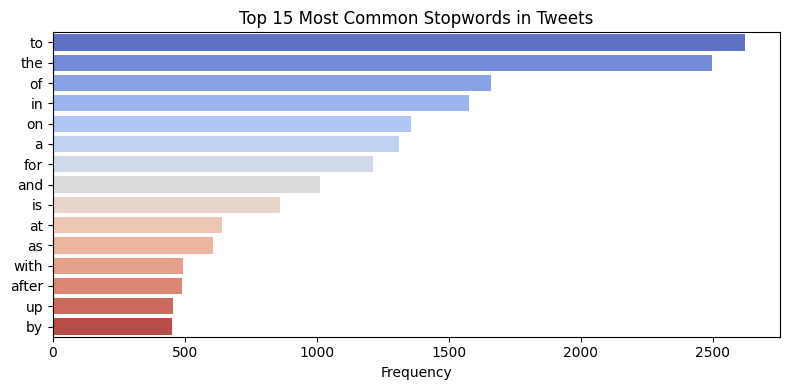

In [ ]:
stop_words = set(stopwords.words('english'))

# Get all stopwords used
all_stops = train_df['text'].apply(lambda x: [word.lower() for word in x.split() if word.lower() in stop_words])
flat_stops = [word for sublist in all_stops for word in sublist]
common_stops = Counter(flat_stops).most_common(15)

# Plot
words, freqs = zip(*common_stops)
plt.figure(figsize=(8, 4))
sns.barplot(x=list(freqs), y=list(words), palette='coolwarm')
plt.title('Top 15 Most Common Stopwords in Tweets')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

'To', 'The', 'Of', and 'In' are the most used stopwords in general.

*What is the Stopword Ratio per Tweet?*

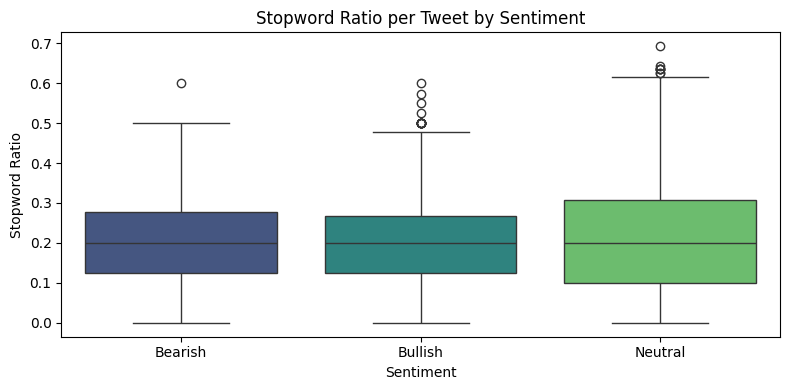

In [ ]:
# Ratio of stopwords to total words
def stopword_ratio(text):
    words = text.lower().split()
    if len(words) == 0:
        return 0
    return sum(1 for w in words if w in stop_words) / len(words)

train_df['stopword_ratio'] = train_df['text'].apply(stopword_ratio)

# Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x='label_name', y='stopword_ratio', data=train_df, palette='viridis')
plt.title('Stopword Ratio per Tweet by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Stopword Ratio')
plt.tight_layout()
plt.show()

There is not a huge difference of the amount of stopwords used between the segements.

*How is the Punctuation ('!', '?', and '...') Usage?*

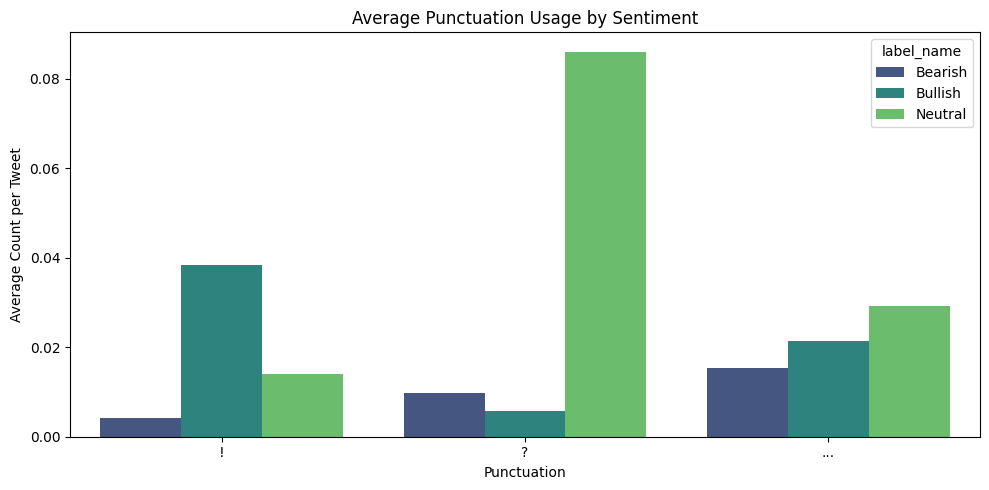

In [ ]:
# Count specific punctuation marks
train_df['exclam_count'] = train_df['text'].apply(lambda x: x.count('!'))
train_df['quest_count'] = train_df['text'].apply(lambda x: x.count('?'))
train_df['ellipsis_count'] = train_df['text'].apply(lambda x: x.count('...'))

# Melt into long format for plotting
punct_long = train_df.melt(id_vars='label_name',
                           value_vars=['exclam_count', 'quest_count', 'ellipsis_count'],
                           var_name='punct_type', value_name='count')

# Rename for clarity
punct_long['punct_type'] = punct_long['punct_type'].map({
    'exclam_count': '!',
    'quest_count': '?',
    'ellipsis_count': '...'
})

# Average punctuation usage by sentiment
plt.figure(figsize=(10, 5))
sns.barplot(x='punct_type', y='count', hue='label_name', data=punct_long, estimator='mean', palette='viridis', ci=None)
plt.title('Average Punctuation Usage by Sentiment')
plt.xlabel('Punctuation')
plt.ylabel('Average Count per Tweet')
plt.tight_layout()
plt.show()


In Bullish, '!' is used the most, and In Neutral, '?' and '...' are used the most.

<a class="anchor" id="2.2.10.">

### 2.2.10. Named Entity Recognition (NER)
<a>

NER is a technique used to **identify and classify entities in the text** such as names of people, organizations, locations, dates, monetary amounts, etc.

NER answers: "What real-world objectis are mentioned in this text?"

In [ ]:
# Apply NER on Tweets
# Load English model
nlp = spacy.load("en_core_web_sm")

# Apply NER to text and collect named entities
def extract_ner_entities(texts, label_filter=None):
    entities = []
    for doc in nlp.pipe(texts, disable=["parser", "tagger"]):
        ents = [ent.text for ent in doc.ents if (label_filter is None or ent.label_ in label_filter)]
        entities.extend(ents)
    return Counter(entities).most_common(15)


/usr/local/lib/python3.11/dist-packages/spacy/pipeline/lemmatizer.py:188: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


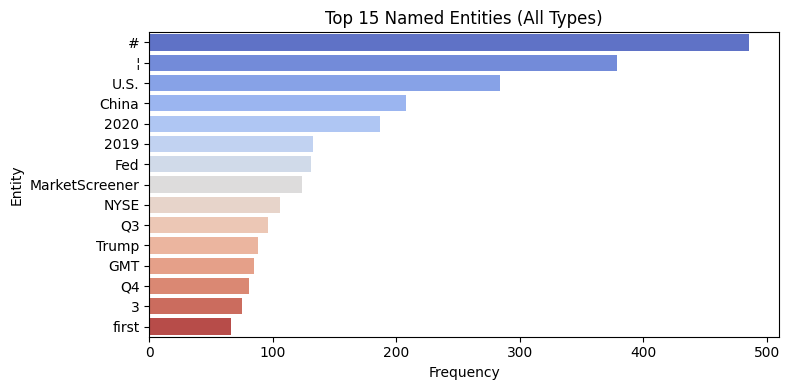

In [ ]:
#show top entities
top_entities = extract_ner_entities(train_df['text'])
entities, freqs = zip(*top_entities)

plt.figure(figsize=(8, 4))
sns.barplot(x=list(freqs), y=list(entities), palette='coolwarm')
plt.title("Top 15 Named Entities (All Types)")
plt.xlabel("Frequency")
plt.ylabel("Entity")
plt.tight_layout()
plt.show()

'#', ':', 'U.S.', and 'China' are the most used Named Entities in general. It makes sense since '#' is how people apply the hashtags.

<a class="anchor" id="2.2.11.">

### 2.2.11. Top Organizations
<a>

*What are the Top Organizations?*

/usr/local/lib/python3.11/dist-packages/spacy/pipeline/lemmatizer.py:188: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


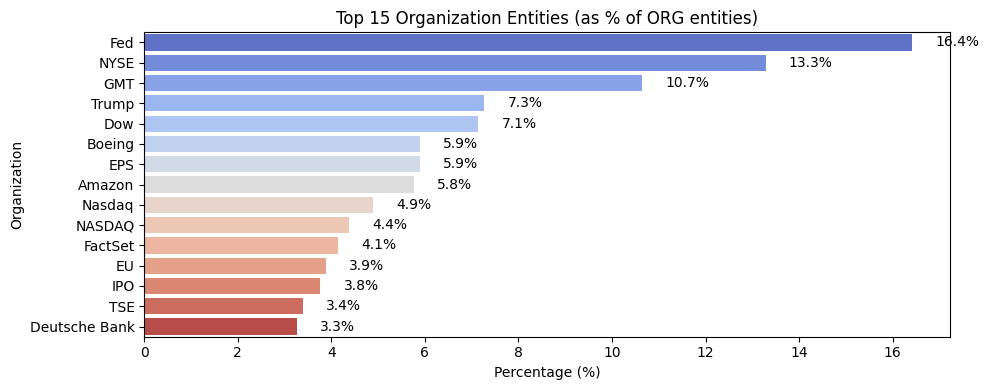

In [ ]:
# Extract top 15 organization entities
top_orgs = extract_ner_entities(train_df['text'], label_filter=['ORG'])
entities, freqs = zip(*top_orgs)

# Calculate total for percentage
total_orgs = sum(freqs)
percentages = [f / total_orgs * 100 for f in freqs]

# Plot
plt.figure(figsize=(10, 4))
sns.barplot(x=percentages, y=entities, palette='coolwarm')
plt.title("Top 15 Organization Entities (as % of ORG entities)")
plt.xlabel("Percentage (%)")
plt.ylabel("Organization")

# Annotate bars with exact percentage values
for i, p in enumerate(percentages):
    plt.text(p + 0.5, i, f"{p:.1f}%", va='center')

plt.tight_layout()
plt.show()


'Fed', 'NYSE', 'GMT' and 'Trump' are the most mentioned organizations in the tweets in general.

<a class="anchor" id="2.2.12.">

### 2.2.12. Top People
<a>

*What are the Top People?*

/usr/local/lib/python3.11/dist-packages/spacy/pipeline/lemmatizer.py:188: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
<ipython-input-127-4282543069>:20: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-127-4282543069>:20: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


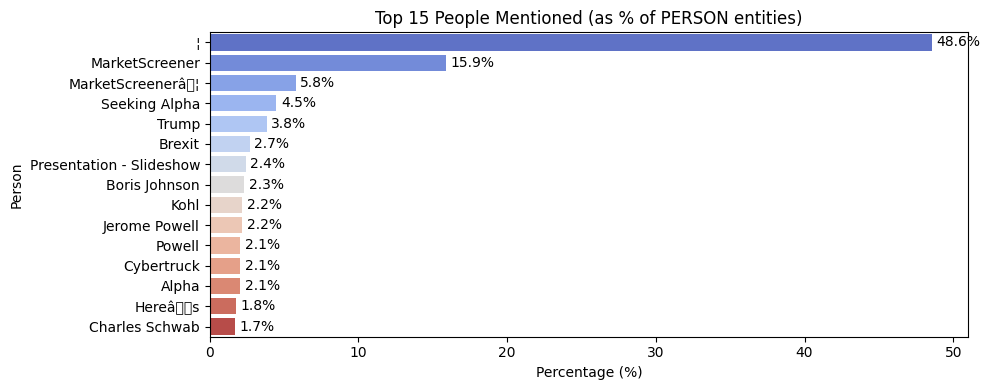

In [ ]:
# Extract top 15 people entities
top_people = extract_ner_entities(train_df['text'], label_filter=['PERSON'])
entities, freqs = zip(*top_people)

# Calculate total for percentage
total_people = sum(freqs)
percentages = [f / total_people * 100 for f in freqs]

# Plot
plt.figure(figsize=(10, 4))
sns.barplot(x=percentages, y=entities, palette='coolwarm')
plt.title("Top 15 People Mentioned (as % of PERSON entities)")
plt.xlabel("Percentage (%)")
plt.ylabel("Person")

# Annotate bars with exact percentage values
for i, p in enumerate(percentages):
    plt.text(p + 0.3, i, f"{p:.1f}%", va='center')

plt.tight_layout()
plt.show()

Most of the extracted words are not people, 'Trump', 'Boris Johnson (maybe it is related to 'Brexit')', and 'Jerome Powell (Powell)' the people who are mentioned the most in the tweets in general.

 <a class="anchor" id="2.2.13.">

### 2.2.13. Top Countries/Cities
<a>

*What are the TOP Countries / Cities?*

/usr/local/lib/python3.11/dist-packages/spacy/pipeline/lemmatizer.py:188: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


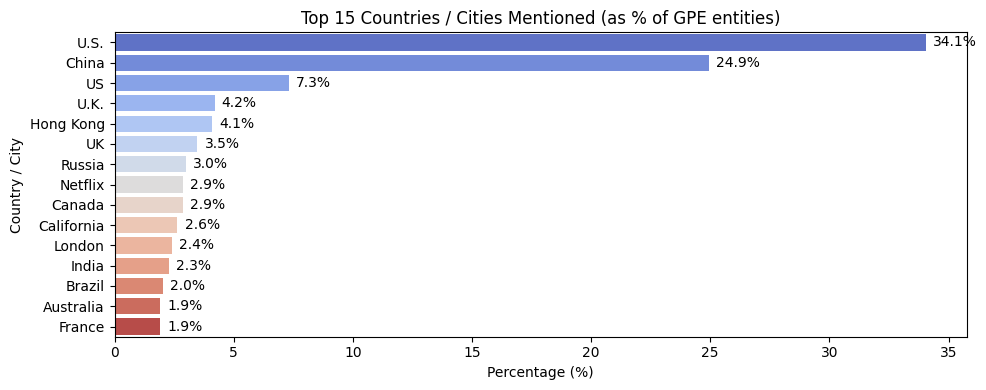

In [ ]:
# Extract top 15 GPE entities (countries/cities)
top_gpe = extract_ner_entities(train_df['text'], label_filter=['GPE'])
entities, freqs = zip(*top_gpe)

# Calculate total for percentage
total_gpe = sum(freqs)
percentages = [f / total_gpe * 100 for f in freqs]

# Plot
plt.figure(figsize=(10, 4))
sns.barplot(x=percentages, y=entities, palette='coolwarm')
plt.title("Top 15 Countries / Cities Mentioned (as % of GPE entities)")
plt.xlabel("Percentage (%)")
plt.ylabel("Country / City")

# Annotate bars with exact percentage values
for i, p in enumerate(percentages):
    plt.text(p + 0.3, i, f"{p:.1f}%", va='center')

plt.tight_layout()
plt.show()

'U.S. (US)', 'China', 'U.K. (UK)', and 'Hong Kong' are top countries/cities mentioned in the tweets in general.

 <a class="anchor" id="2.2.14.">

### 2.2.14. Top Products
<a>

*What are the Top Products mentioned?*

/usr/local/lib/python3.11/dist-packages/spacy/pipeline/lemmatizer.py:188: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


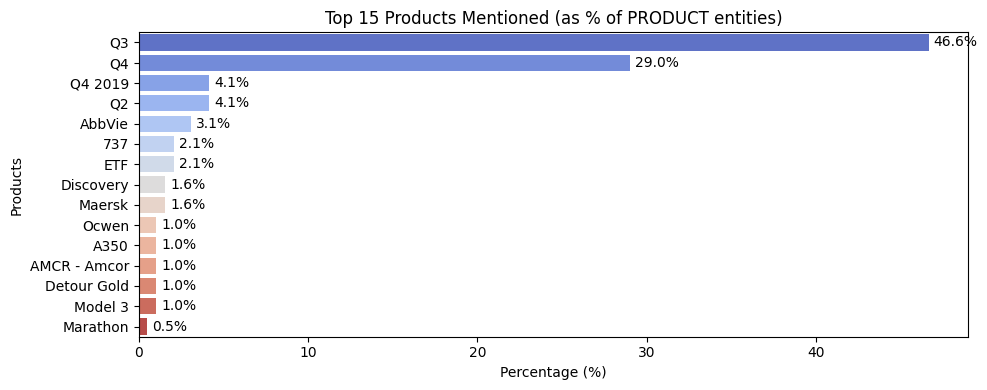

In [ ]:
# Extract top 15 PRODUCT entities
top_products = extract_ner_entities(train_df['text'], label_filter=['PRODUCT'])
entities, freqs = zip(*top_products)

# Calculate total for percentage
total_products = sum(freqs)
percentages = [f / total_products * 100 for f in freqs]

# Plot
plt.figure(figsize=(10, 4))
sns.barplot(x=percentages, y=entities, palette='coolwarm')
plt.title("Top 15 Products Mentioned (as % of PRODUCT entities)")
plt.xlabel("Percentage (%)")
plt.ylabel("Products")

# Annotate bars with exact percentage values
for i, p in enumerate(percentages):
    plt.text(p + 0.3, i, f"{p:.1f}%", va='center')

plt.tight_layout()
plt.show()


It contains some non-product words. 'AbbVie', '737', and 'ETF' are the top products mentioned in the tweets in general.

 <a class="anchor" id="2.2.15.">

### 2.2.15. Top Monetary Amounts
<a>

*Are there Top Monetary Amounts mentioned?*

/usr/local/lib/python3.11/dist-packages/spacy/pipeline/lemmatizer.py:188: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
<ipython-input-130-1731738596>:20: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


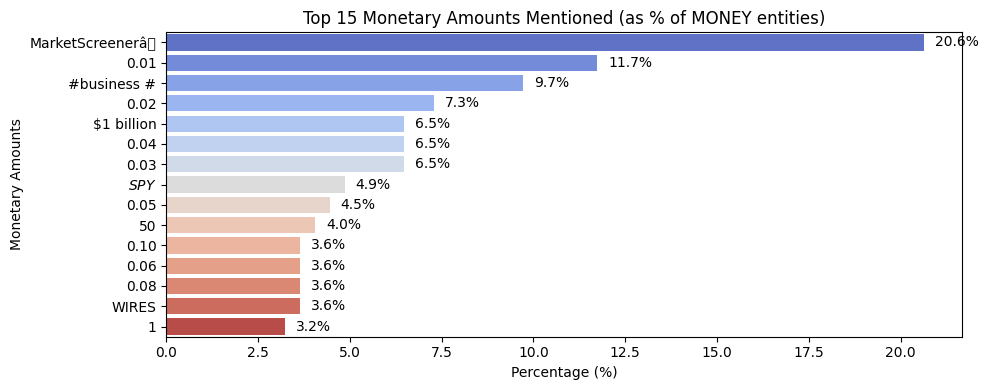

In [ ]:
# Extract top 15 MONEY entities
top_money = extract_ner_entities(train_df['text'], label_filter=['MONEY'])
entities, freqs = zip(*top_money)

# Calculate total for percentage
total_money = sum(freqs)
percentages = [f / total_money * 100 for f in freqs]

# Plot
plt.figure(figsize=(10, 4))
sns.barplot(x=percentages, y=entities, palette='coolwarm')
plt.title("Top 15 Monetary Amounts Mentioned (as % of MONEY entities)")
plt.xlabel("Percentage (%)")
plt.ylabel("Monetary Amounts")

# Annotate bars with exact percentage values
for i, p in enumerate(percentages):
    plt.text(p + 0.3, i, f"{p:.1f}%", va='center')

plt.tight_layout()
plt.show()


It contains non-money amount. '0.01', '0.02', '0.04', and '0.03' are money amounts (%) mentioned the most in the tweets in general. Also '$1 billion' is menioned many times.

 <a class="anchor" id="2.2.16.">

### 2.2.16. Sentiment Distribution for Top 15 Organizations (NER)
<a>

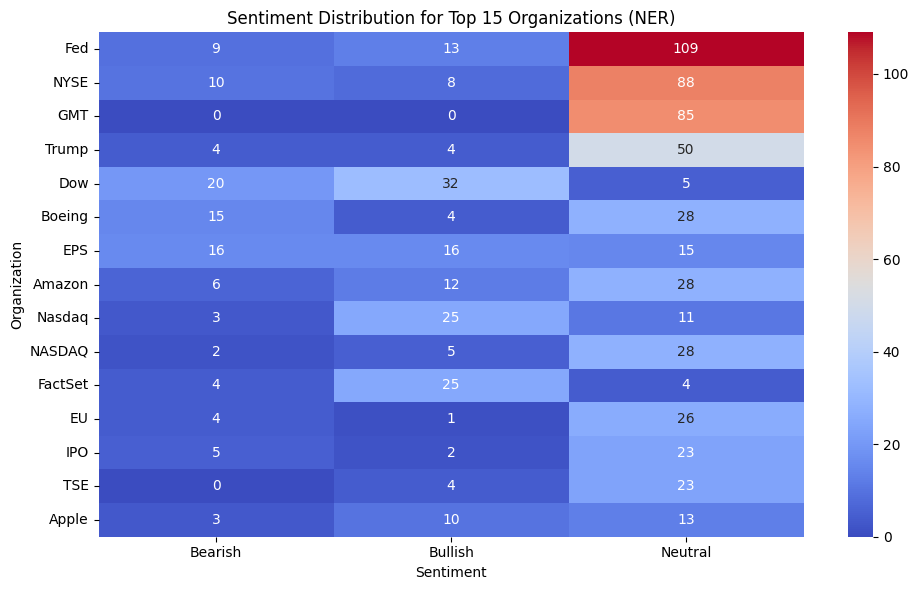

In [ ]:
nlp = spacy.load("en_core_web_sm")

# Function to extract ORG entities from a list of texts
def get_orgs_by_sentiment(df):
    entity_sentiment_map = defaultdict(Counter)
    for _, row in df.iterrows():
        doc = nlp(row['text'])
        for ent in doc.ents:
            if ent.label_ == 'ORG':
                entity_sentiment_map[ent.text.strip()].update([row['label_name']])
    return entity_sentiment_map

# Apply to your dataset
entity_sentiment = get_orgs_by_sentiment(train_df)

# Convert to DataFrame
df_entities = pd.DataFrame(entity_sentiment).fillna(0).T
df_entities = df_entities[['Bearish', 'Bullish', 'Neutral']] if all(s in df_entities.columns for s in ['Bearish', 'Bullish', 'Neutral']) else df_entities

# Filter to top N entities by total mentions
top_entities = df_entities.sum(axis=1).sort_values(ascending=False).head(15).index
df_top = df_entities.loc[top_entities]

df_top_int = df_top.astype(int)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_top_int, annot=True, fmt='d', cmap='coolwarm')
plt.title("Sentiment Distribution for Top 15 Organizations (NER)")
plt.xlabel("Sentiment")
plt.ylabel("Organization")
plt.tight_layout()
plt.show()


- In Bearish sentiment, 'Dow', 'ESP', and 'Boeing' are top organization mentioned in the tweets.
- In Bullish sentiment, 'Dow', 'Nasdaq (NASDAQ), and 'FackSet' are top organization mentioned in the tweets.
- In Neutral sentiment, 'Fed', 'NYSE', and 'GMT' are top organization mentioned in the tweets.

Group by Sentiment:

In [ ]:
# Example: extract top ORGs per sentiment
for sentiment in train_df['label_name'].unique():
    subset = train_df[train_df['label_name'] == sentiment]
    top_ents = extract_ner_entities(subset['text'], label_filter=['ORG'])
    print(f"\nTop ORGs for sentiment: {sentiment}")
    print(top_ents)

/usr/local/lib/python3.11/dist-packages/spacy/pipeline/lemmatizer.py:188: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)



Top ORGs for sentiment: Bearish
[('Dow', 20), ('EPS', 16), ('Boeing', 15), ('Deutsche Bank', 11), ('Macy', 11), ('NYSE', 10), ('Fed', 9), ('OPEC', 8), ('Credit Suisse', 7), ('KeyBanc Capital', 7), ('NFLX', 6), ('MAX', 6), ('Amazon', 6), ('S&P', 6), ('Q4', 6)]

Top ORGs for sentiment: Bullish
[('Dow', 32), ('FactSet', 25), ('Nasdaq', 25), ('EPS', 16), ('BofA Merrill Lynch', 14), ('Fed', 13), ('Amazon', 12), ('FDA', 12), ('Deutsche Bank', 11), ('Apple', 10), ('UBS', 9), ('JPMorgan', 9), ('Morgan Stanley', 9), ('Overweight', 8), ('KeyBanc Capital', 8)]

Top ORGs for sentiment: Neutral
[('Fed', 109), ('NYSE', 88), ('GMT', 85), ('Trump', 50), ('Boeing', 28), ('Amazon', 28), ('NASDAQ', 28), ('EU', 26), ('IPO', 23), ('TSE', 23), ('CFO', 21), ('Ford', 17), ('Congress', 16), ('Google', 16), ('EPS', 15)]


 <a class="anchor" id="2.3.">

## 2.3. Lexicon-Based Sentiment Analysis
<a>

Lexicon-Based Sentiment Analysis uses a predefined dictionary of words assoicated with sentiment scores. Each word has a polarity score (positive or negative) and sometimes intensity. The overall sentiment score for a text is computed by aggregating the scores of the individual words.

Compare these scores with labeled categories (Bearish, Bullish, and Neutral) to see if labels align with lexicon-based scores (e.g., bullish --> positive score, bearish --> negative score).


According to the VADER documentations, the author suggest this rule of thumb for interpreting the compund score:

| Compound Score Range     | Sentiment Category    |
|--------------------------|------------------------|
| ` >= 0.05`       | **Positive** (Bullish) |
| `<= -0.05`      | **Negative** (Bearish) |
| `-0.05 < c < 0.05`| **Neutral**            |

In [ ]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to convert compound score to label
def vader_to_label(score):
    if score >= 0.05:
        return "Bullish"
    elif score <= -0.05:
        return "Bearish"
    else:
        return "Neutral"

In [ ]:
# Apply sentiment analysis to the dataset
train_df['vader_scores'] = train_df['text'].apply(analyzer.polarity_scores)
train_df = pd.concat([train_df.drop(columns='vader_scores'), train_df['vader_scores'].apply(pd.Series)], axis=1)

# Map VADER scores to sentiment labels
train_df['vader_sentiment'] = train_df['compound'].apply(vader_to_label)

In [ ]:
# Confusion Matrix
labels = ['Bearish', 'Bullish', 'Neutral']
cm = confusion_matrix(train_df['label_name'], train_df['vader_sentiment'], labels=labels)


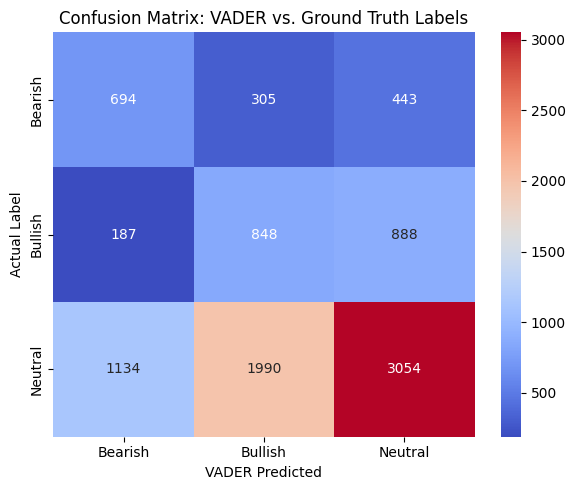

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=labels, yticklabels=labels)
plt.xlabel("VADER Predicted")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix: VADER vs. Ground Truth Labels")
plt.tight_layout()
plt.show()

For Neutral sentiment, it seems like VADER prediction works. For Bullish and Bearish, most tweets are labeled as neautral by VADAR. After Neutral, they are labeled correctly by VADAR.

<a class="anchor" id="2.4.">

## 2.4. Character Encoding Issues
<a>

We are going to check for potentially problematic text in tweets in train set.

In [ ]:
# Check for potential encoding problems (non-ASCII characters)
non_ascii_counts = train_df['text'].apply(lambda x: len(re.findall(r'[^\x00-\x7F]', str(x))))
print("Rows with non-ASCII characters:", (non_ascii_counts > 0).sum())

# Display a few examples
print("\nExamples of texts with non-ASCII characters:")
display(train_df[non_ascii_counts > 0].head(5))

There are 2,243 rows with non-ASCII characters which might be problematic.

<a class="anchor" id="3.">

# 3. Data Exploration for Test Set
<a>

<a class="anchor" id="3.1.">

## 3.1. Brief Preliminary Analysis
<a>

In [ ]:
print("First few rows of test.csv:")
display(test_df.head())

First few rows of test.csv:


,id,text
0,0,ETF assets to surge tenfold in 10 years to $50...
1,1,Hereâs What Hedge Funds Think Evolution Petr...
2,2,$PVH - Phillips-Van Heusen Q3 2020 Earnings Pr...
3,3,China is in the process of waiving retaliatory...
4,4,"Highlight: âWhen growth is scarce, investors..."


In [ ]:
# Check the number of rows and columns 
print("\nShape of test dataset:", test_df.shape)


Shape of test dataset: (2388, 2)


In [ ]:
print("\nInfo on test dataset:")
test_df.info()


Info on test dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2388 entries, 0 to 2387
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2388 non-null   int64 
 1   text    2388 non-null   object
dtypes: int64(1), object(1)
memory usage: 37.4+ KB


In [ ]:
# Check for missing values
print("\nMissing values in test dataset:")
print(test_df.isnull().sum())


Missing values in test dataset:
id      0
text    0
dtype: int64


There are no missing values in test dataset.

<a class="anchor" id="3.2.">

## 3.2. Length of Texts
<a>

Text Length Stats:


,text
count,2388.000000
mean,87.468174
std,35.868800
min,4.000000
25%,59.000000
50%,81.000000
75%,122.000000
max,227.000000


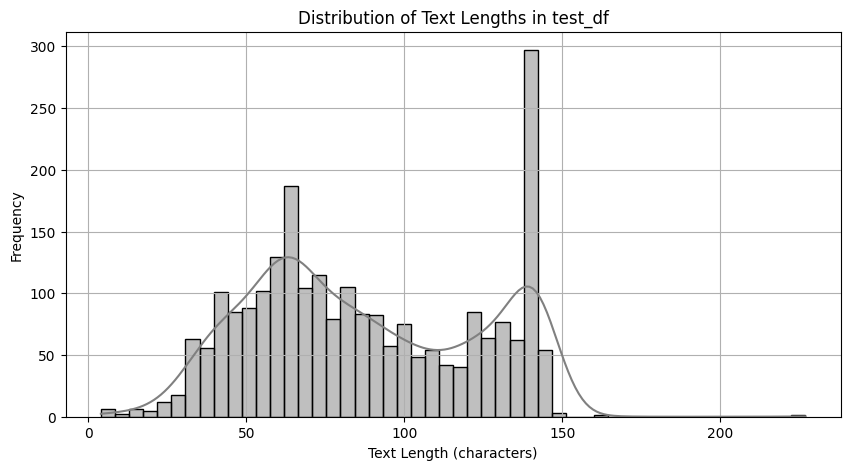

In [ ]:
# Compute text lengths temporarily
text_lengths = test_df['text'].apply(len)

# Summary stats
print("Text Length Stats:")
display(text_lengths.describe())

# Plot the distribution
plt.figure(figsize=(10, 5))
sns.histplot(text_lengths, bins=50, kde=True, color='grey')
plt.title("Distribution of Text Lengths in test_df")
plt.xlabel("Text Length (characters)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

- The maximum number of texts in a tweet is 227 and the minimum is 4.
- The average number of texts in a tweet is 87.47.
- Most tweets consist of 140-145 texts, followed by 65-70 texts.

<a class="anchor" id="3.3.">

## 3.3. Word Count Distribution
<a>

Word Count Stats:


,text
count,2388.000000
mean,12.323283
std,4.724165
min,1.000000
25%,9.000000
50%,12.000000
75%,15.000000
max,33.000000


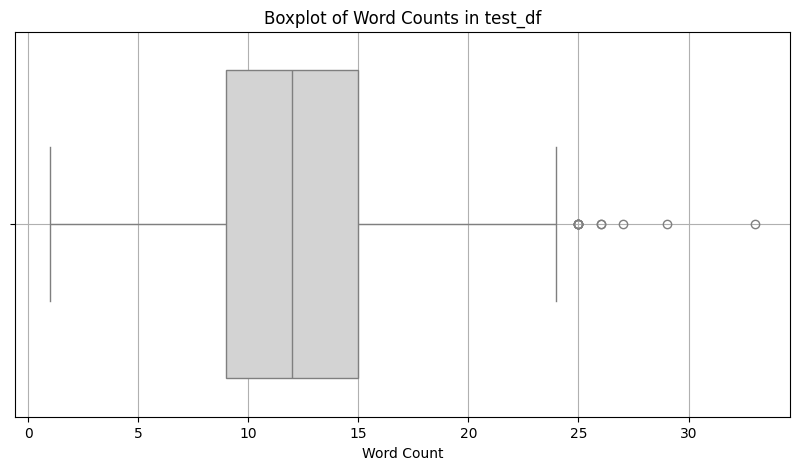

In [ ]:
# Word count per tweets
word_counts = test_df['text'].apply(lambda x: len(str(x).split()))

print("Word Count Stats:")
display(word_counts.describe())

# Plot
plt.figure(figsize=(10, 5))
sns.boxplot(x=word_counts, color='lightgrey')
plt.title("Boxplot of Word Counts in test_df")
plt.xlabel("Word Count")
plt.grid(True)
plt.show()

Most tweets consist of around 8-15 words.

<a class="anchor" id="3.4.">

## 3.4. Most Frequent Words (Tokens)
<a>

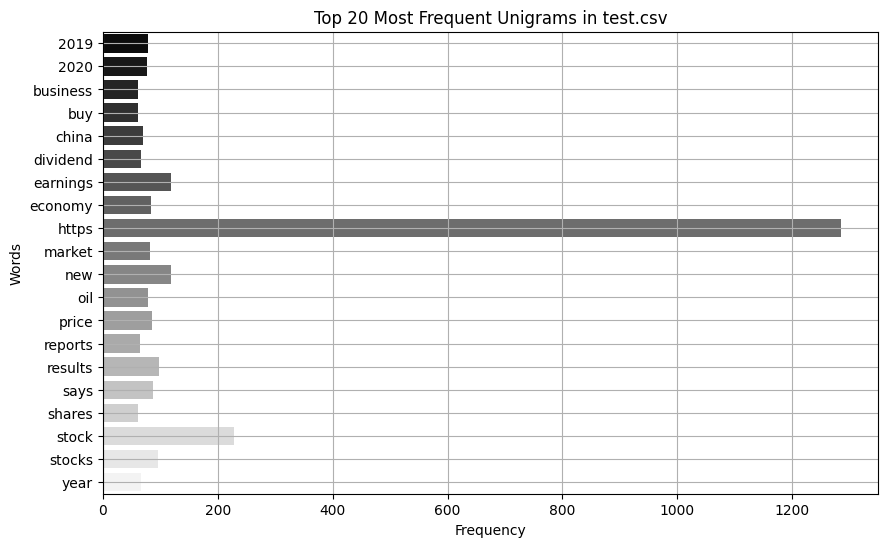

In [ ]:
# Use CountVectorizer to get top tokens
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(test_df['text'])
unigram_freq = X.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()

# Barplot of top 20 tokens
plt.figure(figsize=(10, 6))
sns.barplot(x=unigram_freq, y=words, palette='coolwarm')
plt.title("Top 20 Most Frequent Unigrams in test.csv")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.grid(True)
plt.show()

The most mentioned tokens in tweets is "https", followed by "stock", "earnings" and "new".

<a class="anchor" id="3.4.1.">

### 3.4.1. Word Cloud

<a>


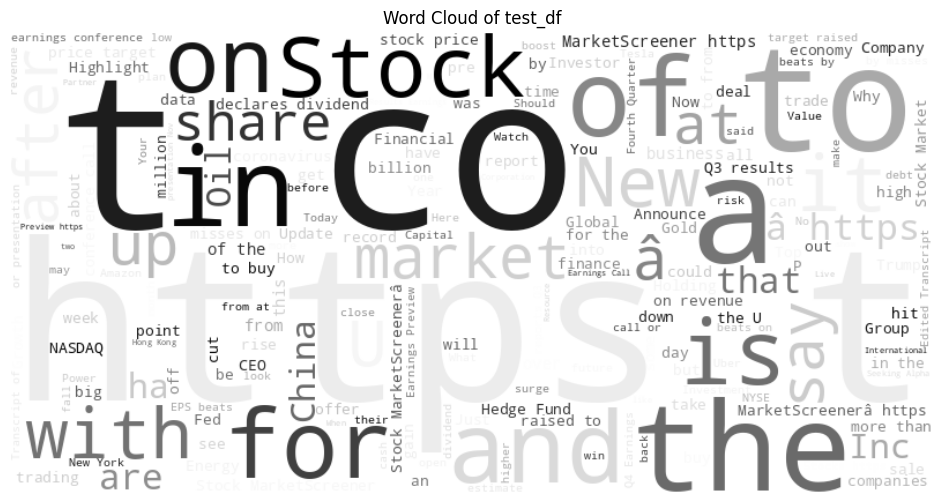

In [ ]:
# Join all text into one string
all_text = ' '.join(test_df['text'].dropna().astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords='english', colormap='coolwarm').generate(all_text)

# plot
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of test_df")
plt.show()

<a class="anchor" id="3.5.">

## 3.5. Character Encoding Issues
<a>

We are going to check for potentially problematic text in tweets.

In [ ]:
# Check for potential encoding problems (non-ASCII characters)
non_ascii_counts = test_df['text'].apply(lambda x: len(re.findall(r'[^\x00-\x7F]', str(x))))
print("Rows with non-ASCII characters:", (non_ascii_counts > 0).sum())

# Display a few examples
print("\nExamples of texts with non-ASCII characters:")
display(test_df[non_ascii_counts > 0].head(5))

Rows with non-ASCII characters: 585

Examples of texts with non-ASCII characters:


,id,text
1,1,Hereâs What Hedge Funds Think Evolution Petr...
3,3,China is in the process of waiving retaliatory...
4,4,"Highlight: âWhen growth is scarce, investors..."
8,8,Uber's arrival caused binge drinking to increa...
13,13,Federal Reserve officials will feel comfortabl...


There are 585 rows with non-ASCII characters which might be problematic.

<a class="anchor" id="4.">

# 4. Side-by-Side Comparison of Train and Test Sets Distributions
<a>

We are going to compare the train set and test set.<br>

Why this is useful:
  - Helps detect data leakage
  - Ensures model generalizability, if the test set is too different, the model might underperform

<a class="anchor" id="4.1.">

## 4.1. Text Length Comparision
<a>

We are going to compare the text lenghts between train set and text set.

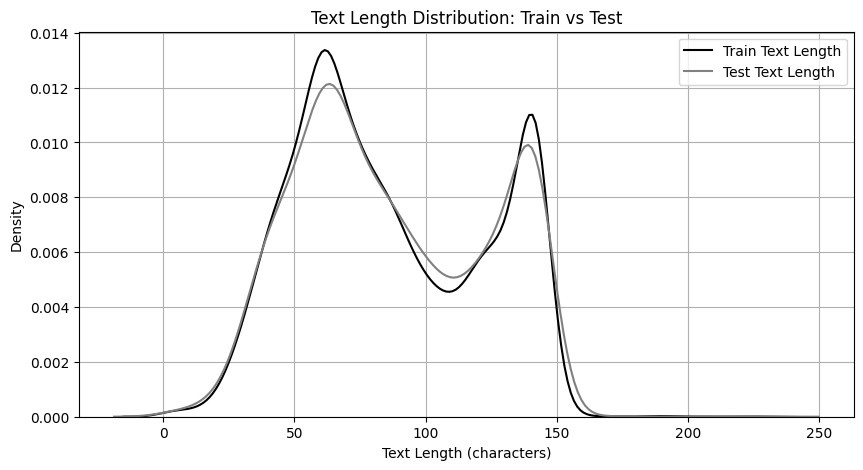

In [ ]:
# Compare text lengths
train_lengths = train_df['text'].apply(len)
test_lengths = test_df['text'].apply(len)

plt.figure(figsize=(10, 5))
sns.kdeplot(train_lengths, label='Train Text Length', color='blue')
sns.kdeplot(test_lengths, label='Test Text Length', color='red')
plt.title("Text Length Distribution: Train vs Test")
plt.xlabel("Text Length (characters)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

The text length distribution of train and test sets are quite similar. 

<a class="anchor" id="4.2.">

## 4.2. Word Count Comparison
<a>

We are going to compare the distribution of number of words in tweets in train and test sets.

In [ ]:
def plot_word_count_distribution(train_series, test_series, bins=20):
    """
    Plots word count distribution for train and test datasets.

    Args:
        train_series (pd.Series): Training text data.
        test_series (pd.Series): Testing text data.
        bins (int): Number of bins for the histogram.
    """
    # Compute word counts
    train_words = train_series.apply(lambda x: len(str(x).split()))
    test_words = test_series.apply(lambda x: len(str(x).split()))

    plt.figure(figsize=(12, 6))

    # Histogram
    sns.histplot(train_words, bins=bins, color='blue', label='Train',
                 stat='density', alpha=0.5, edgecolor='black')
    sns.histplot(test_words, bins=bins, color='red', label='Test',
                 stat='density', alpha=0.5, edgecolor='black')

    # KDE
    sns.kdeplot(train_words, color='blue', linewidth=2)
    sns.kdeplot(test_words, color='red', linewidth=2)

    # Titles and labels
    plt.title("Word Count Distribution: Train vs Test", fontsize=16, fontweight='bold')
    plt.xlabel("Word Count", fontsize=14)
    plt.ylabel("Density", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(alpha=0.3)
    plt.legend(title="Dataset", fontsize=12)
    plt.tight_layout()
    plt.show()

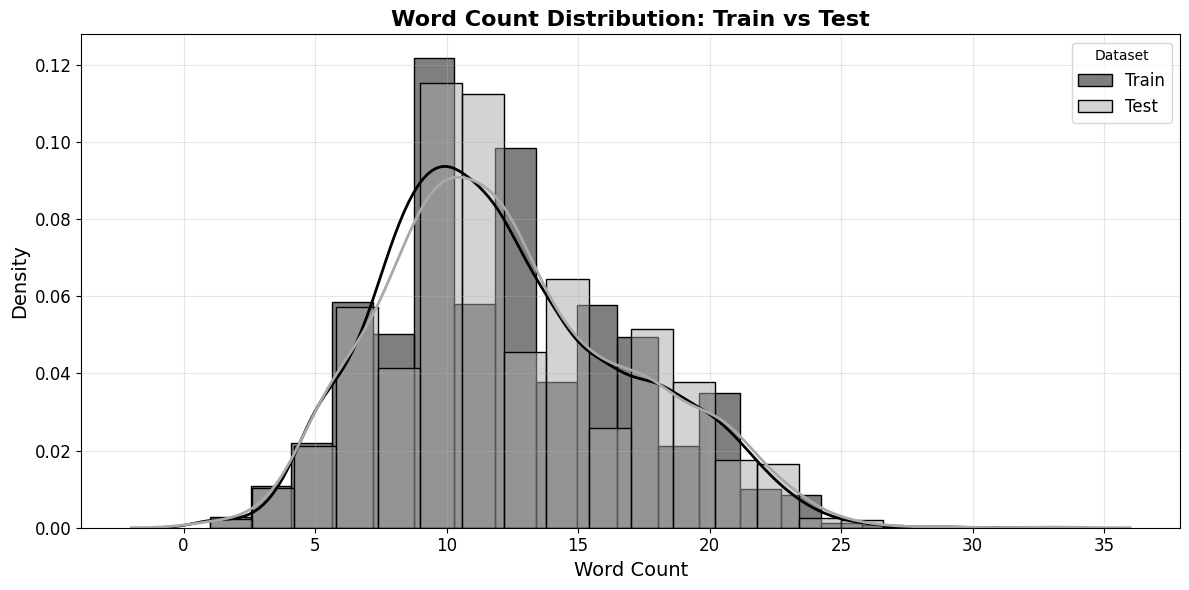

In [ ]:
# Plot
plot_word_count_distribution(train_df['text'], test_df['text'])

Although bins shows difference between train and test sets, the kernel density estimate (KDE) plot shows that train and test sets have similar distribution of number of words in tweets between between train and test sets.

# 3. Corpus Split

Performing a train-test split to obtain a training and validation data. As of now, we still may use ML Models that benefit from the features created in EDA (tweet_lenght, char_lenght, etc.). For that reason, we will keep them in the X_train set, while keeping in mind that this will require separate pipelines during the preprocessing stage.

In [ ]:
train_df.head(1)

,text,label,label_name,tweet_length,char_length,uppercase_ratio,has_link,stopword_ratio,exclam_count,quest_count,ellipsis_count,neg,neu,pos,compound,vader_sentiment
0,$BYND - JPMorgan reels in expectations on Beyo...,0,Bearish,10,77,0.155844,1,0.2,0,0,0,0.0,1.0,0.0,0.0,Neutral


In [ ]:
X = train_df.drop(columns=['label', 'label_name'])
y = train_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# 4. Data Preprocessing

## 4.1. Pipeline for Text Models




This section covers preprocessing strategies tailored for **deep learning models**, which require specific formats. <br>
*Note: Engineered features from EDA (e.g., tweet length, char count) are excluded from text models because LSTM and Transformers rely solely on raw text sequences for learning contextual patterns.*

In [ ]:
X_train_text = X_train['text']
X_test_text = X_test['text']

### 4.1.1. LSTM

LSTM models require sequences of integers as input. The pipeline includes:



### `Text Cleaning`

Cleaning text for an LSTM model includes:
- removing punctuation other than specifically used in financial tweets context
- removing multiple whitespace
- normalizing url's and mentions

In [ ]:
# === Phase 1: Improved Cleaning Function ===
def clean_text_for_lstm(text):
    text = text.lower()
    # Replace URLs with <URL>
    text = re.sub(r'http\S+|www.\S+', '<URL>', text)
    # Replace mentions with <USER>
    text = re.sub(r'@\w+', '<USER>', text)
    # Keep letters, digits, $, #, @, %, spaces; remove other punctuation
    text = re.sub(r"[^a-z0-9$#@% ]", " ", text)
    # Remove multiple spaces - normalize whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text



### `Tokenization, Sequencing and Padding`

 Converting text to integer sequences with optimal *maxlen* and *vocabulary size*. This pipeline includes:

  - Texts are converted to integer sequences using a `Tokenizer`.
  - Sequences are padded/truncated to a fixed `max_length`.
  - Output: `X_train_seq`, `X_test_seq` (NumPy arrays).

In [ ]:
# === Phase 2-4: Tokenizer Class ===
class LSTMTokenizer(BaseEstimator, TransformerMixin):
    def __init__(self, num_words=10000, max_length=30):
        self.num_words = num_words
        self.max_length = max_length
        self.tokenizer = Tokenizer(num_words=num_words, oov_token="<OOV>", filters='')

    def fit(self, X, y=None):
        # Clean text before fitting
        X_clean = X.apply(clean_text_for_lstm)
        self.tokenizer.fit_on_texts(X_clean)
        return self

    def transform(self, X, y=None):
        X_clean = X.apply(clean_text_for_lstm)
        sequences = self.tokenizer.texts_to_sequences(X_clean)
        padded = pad_sequences(sequences, maxlen=self.max_length, padding='post', truncating='post')
        return padded

    def get_vocab_size(self):
        return min(self.num_words, len(self.tokenizer.word_index) + 1)

**Application**:

In [ ]:
lstm_tokenizer = LSTMTokenizer(num_words=10000, max_length=30)

# Fit on training text
lstm_tokenizer.fit(X_train_text)

# Transform training and test text to padded sequences
X_train_seq = lstm_tokenizer.transform(X_train_text)
X_test_seq = lstm_tokenizer.transform(X_test_text)

print("Train sequences shape:", X_train_seq.shape)
print("Test sequences shape:", X_test_seq.shape)
print("Vocabulary size:", lstm_tokenizer.get_vocab_size())

Train sequences shape: (7634, 30)
Test sequences shape: (1909, 30)
Vocabulary size: 10000


### 4.1.2. Transformers models

Transformer models (like FinBERT) uses Hugging Face tokenizer to convert text into token IDs and attention masks, which are input directly to a transformer model (e.g., FinBERT) for fine-tuning. Requires GPU and more compute but can capture deep contextual nuances. The pipeline includes:

**`Tokenization`**
  - Uses `AutoTokenizer` from Hugging Face Transformers.
  - Applies truncation and padding automatically.
  - Converts text into a dictionary of PyTorch tensors (`input_ids`, `attention_mask`).
  - Output: `tokenized_train`.

In [ ]:
class HFTokenizer(BaseEstimator, TransformerMixin):
    def __init__(self, model_name='yiyanghkust/finbert-tone', max_length=128):
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.max_length = max_length

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return self.tokenizer(
            X.tolist(),
            padding=True,
            truncation=True,
            max_length=self.max_length,
            return_tensors='pt'
        )


**Application:**

In [ ]:
# Instantiate your tokenizer
hf_tokenizer = HFTokenizer(model_name='yiyanghkust/finbert-tone', max_length=128)

# Since fit does nothing, you can just call it or skip it
hf_tokenizer.fit(X_train_text)

# Tokenize your training text - transform returns a dict of PyTorch tensors
tokenized_train = hf_tokenizer.transform(X_train_text)

# tokenized_train is a dict with keys like 'input_ids', 'attention_mask'
print(tokenized_train.keys())

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])


## 4.2. For ML Models




### Our pipeline includes:
Custom text cleaning function `clean_text` <br>
- Converts text to lowercase.
- Removes anything that's not an English letter (removes numbers, punctuation, etc).
- Removes stopwords.
- Lemmatizes each word (e.g., “running” → “run”).
- Joins cleaned words back into a string.

Custom transformer `TextCleaner`  <br>
- Wraps clean_text so it can be used inside an sklearn pipeline seamlessly.
- .transform() applies the cleaning to each text sample.

Separate pipelines for different feature types:  <br>
- Text pipeline: applies text cleaning and then converts text to TF-IDF vectors (up to 5000 features).
- Numeric pipeline: scales numeric columns with StandardScaler.
- Categorical pipeline: encodes categorical columns using one-hot encoding, ignoring unknown categories in test data.

Preprocessor_ml — a combined preprocessor using ColumnTransformer:  <br>
- Applies text_pipeline to your text column (text_col is a variable you define containing the name of your text column).
- Applies num_pipeline to all your numeric columns.
- Applies cat_pipeline to all your categorical columns.

In [ ]:
# Make sure this is correct
text_col = ['text']
# Safe dynamic check
categorical_cols = [col for col in ['label_name', 'vader_sentiment'] if col in X_train.columns]
numeric_cols = [col for col in X_train.columns if col not in categorical_cols + ['text']]

### `Customizing stop words`

To consider potentially important terms, either domain-specific or sentiment suggestive

In [ ]:
custom_stop_words = set(stopwords.words('english'))
# Add domain or Twitter-specific words you want to remove
custom_stop_words.update(['rt', 'via', 'http', 'https', 'www', 'co', 'amp'])

# Optionally, remove words you want to keep (e.g., 'not' if sentiment important)
custom_stop_words.difference_update({'not', 'never', 'nor', 'none', "n't", 'very', 'too', 'more', 'most', 'least', 'much'})


stop_words = custom_stop_words


In [ ]:
stop_words = custom_stop_words
lemmatizer = WordNetLemmatizer()

# === Custom text cleaning function ===
def clean_text(text):
    # Add check for non-string types before attempting string methods
    if not isinstance(text, str):
        # Handle non-string input, perhaps return an empty string or a specific placeholder
        # Printing is for debugging, you might want a more robust way in production
        print(f"Warning: Non-string input detected in clean_text: {type(text)}")
        return "" # or str(text) if you want to convert other types
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove URLs
    # Keep $-prefixed tickers, remove standalone $ or $ followed by non-word chars
    text = re.sub(r'(?<!\w)\$(?!\w+)', '', text) # Remove standalone $
    text = re.sub(r'\$([^a-zA-Z0-9])', r'\1', text) # Remove $ followed by non-word char

    text = re.sub(r"@\w+|#\w+", '', text)  # remove mentions, hashtags
    text = re.sub(r"[^a-z\s]", '', text)  # remove punctuation/numbers (but keep $-prefixed tickers)

    words = text.split() # Split into words first
    words = [word for word in words if word not in stop_words]  # stopword removal

    # Lemmatization (keep this if you intend to use it later)
    # Requires POS tagging, which is expensive. If only for ML pipelines,
    # TF-IDF/CountVectorizer usually work directly on cleaned tokens.
    # If you use lemmatization, re-enable these lines and import necessary modules
    # pos_tags = pos_tag(words)  # POS tagging
    # lemmatized = [lemmatizer.lemmatize(t, get_wordnet_pos(pos)) for t, pos in pos_tags]  # lemmatize
    # return " ".join(lemmatized)

    # If skipping lemmatization in this clean_text for ML models:
    return " ".join(words)


# Helper: Map POS tag to WordNet tag for lemmatization (needed if lemmatization is used)
# from nltk import pos_tag
# from nltk.corpus import wordnet
# def get_wordnet_pos(tag):
#     if tag.startswith('J'): return wordnet.ADJ
#     elif tag.startswith('V'): return wordnet.VERB
#     elif tag.startswith('N'): return wordnet.NOUN
#     elif tag.startswith('R'): return wordnet.ADV
#     else: return wordnet.NOUN

# === Custom transformer for sklearn pipeline ===
class TextCleaner(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # If X is a DataFrame with one column, extract the Series
        if isinstance(X, pd.DataFrame):
            X = X.iloc[:, 0]
        return X.apply(self._safe_clean_text)

    def _safe_clean_text(self, text):
        if not isinstance(text, str):
            print("Warning: Non-string input detected in clean_text:", type(text))
            return ""
        return clean_text(text)





# === Pipelines for each type ===

# Text pipeline for ML models
text_pipeline = Pipeline([
    # Pass the column name to TextCleaner so it knows which column to process if needed,
    # or rely on ColumnTransformer passing the correct Series.
    # The current TextCleaner expects a Series as X, which is what ColumnTransformer does
    ("cleaner", TextCleaner()),
    ("tfidf", TfidfVectorizer(max_features=5000))
])

# Numeric pipeline
num_pipeline = Pipeline([
    ("scaler", StandardScaler())  #or another scaler
])

# Categorical pipeline
cat_pipeline = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Preprocessor for ML models
preprocessor_ml = ColumnTransformer([
    ("text", text_pipeline, text_col), # Ensure text_col is passed as a list
    ("numeric", num_pipeline, numeric_cols),
    ("categorical", cat_pipeline, categorical_cols)
])



In [ ]:
print(X_train[text_col].head())
print(X_train[numeric_cols].head())
print(X_train[categorical_cols].head())


                                                   text
2186          Nasdaq prices 600M of 0.875% senior notes
6819                 Futures up https://t.co/diz7v5lmVb
6157  $ECONX: November Nonfarm Private Payrolls 125K...
2462  Twitter users explain why Kohl's stock just go...
4097  Agilysys : Restaurants Find Sustainable Method...
      tweet_length  char_length  uppercase_ratio  has_link  stopword_ratio  \
2186             7           41         0.048780         0        0.142857   
6819             3           34         0.058824         1        0.333333   
6157            11          112         0.169643         1        0.000000   
2462            15          138         0.072464         1        0.200000   
4097            16          135         0.118519         1        0.187500   

      exclam_count  quest_count  ellipsis_count    neg    neu    pos  compound  
2186             0            0               0  0.000  1.000  0.000    0.0000  
6819             0            0  

**Applying the pipeline:**

In [ ]:
#TEST IT ---------------
# Fit and transform
# Fit preprocessor on X_train
preprocessor_ml.fit(X_train)

# Transform training and test data
X_train_processed = preprocessor_ml.transform(X_train)
X_test_processed = preprocessor_ml.transform(X_test)

# Print shapes to verify
print("Shape after preprocessing (Train):", X_train_processed.shape)
print("Shape after preprocessing (Test):", X_test_processed.shape)



Shape after preprocessing (Train): (7634, 5015)
Shape after preprocessing (Test): (1909, 5015)


## Preprocessing summary:


- **LSTM Models** → Use `X_train_seq`, `X_test_seq` (padded sequences from `LSTMTokenizer`).

- **Transformer Models** → Use `tokenized_train` (dictionary of tensors: `input_ids`, `attention_mask`, etc.)

- **ML Models (e.g., KNN, XGBoost, Logistic Regression)** → Use `X_train_processed`, `X_test_processed` (from `preprocessor_ml`).

Each dataset is now tailored to the needs of its respective model type. Next step: continue to **Feature Engineering** for improved model performance.

# 5. Feature Engineering

## 5.1. Techniques Used

This section outlines the feature engineering strategies applied to prepare text and structured data for different model families, following course requirements.

- **TF-IDF (BoW variation)**: Implemented via `TfidfVectorizer` within the sklearn pipeline, applied to cleaned text for traditional ML models (e.g., Logistic Regression, Random Forest). Converts text into sparse vector features.

- **Transformer Encoder (mandatory)**: Used the HuggingFace `AutoTokenizer` with the `yiyanghkust/finbert-tone` model to extract contextual embeddings for Transformer-based models.

- **Additional Variation (Transformer Encoder)**: Employed **Sentence-BERT** (`all-MiniLM-L6-v2`) to generate dense semantic embeddings from tweets. These embeddings are used as features for experiments with models like SVM or Logistic Regression.

- **Engineered Features from EDA**: Numeric (e.g., tweet length, sentiment scores) and categorical features were created during EDA and integrated into the ML pipeline. These features are treated as **numeric** or **categorical** depending on their type:
  - Numeric features were scaled using `StandardScaler`
  - Categorical features were encoded with one-hot encoding in the combined `preprocessor_ml`.

*Note: For LSTM and Transformer deep learning models, engineered numeric/categorical features from EDA are **not included**, since these models work directly on raw text or embeddings.*



## 5.2. Additional Transformer-Based Embedding: Sentence-Bert

  Generates fixed-size dense vector embeddings from raw text using a pretrained Sentence-BERT model. These embeddings can be used as numeric features in traditional ML models or simple neural networks. Easier and faster to use, does not require fine-tuning.

In [ ]:
from sentence_transformers import SentenceTransformer

sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

# Convert text to dense vectors
X_train_embed = sbert_model.encode(X_train_text.tolist(), show_progress_bar=True)
X_test_embed = sbert_model.encode(X_test_text.tolist(), show_progress_bar=True)


Batches:   0%|          | 0/239 [00:00<?, ?it/s]

Batches:   0%|          | 0/60 [00:00<?, ?it/s]

## Using Sentence-BERT Embeddings vs. Transformer Tokenizer Pipeline

Sentence-BERT embeddings provide a fast, resource-efficient way to leverage powerful semantic representations without full transformer fine-tuning. The transformer tokenizer pipeline, by contrast, enables end-to-end contextual learning but at higher computational cost.

- **In Conclusion:**  
  We will run separate experiments with each approach to compare performance. Use Sentence-BERT embeddings as input features in ML models or simple NNs, and transformer tokenization for fine-tuning transformer architectures.

*Note: If used for ML models, it will replace the text cleaning + TF-IDF part of the pipeline, but still requires categorical data handling - update `preprocessor_ml` to replace text clean function by BERT*


# 6. Classification Model

# 7. Evaluation